<a href="https://colab.research.google.com/github/DigiBP/digibp-camunda-classroom/blob/master/modelling/pmml/ML_Getting_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Getting Started with scikit-learn
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/) [![Binder](https://binder.pangeo.io/badge_logo.svg)](https://mybinder.org/v2/gh/) [![deepnote](https://deepnote.com/buttons/launch-in-deepnote-small.svg)](https://beta.deepnote.org/launch?template=python_3.6&url=https%3A%2F%2Fgithub.com)

This short tutorial is intended to provide a straight forward introduction to machine learning using the widely used Python library **scikit-learn** (aka sklearn).

> Trivia: The name *SciKit* is derived from its original intention being a SciPy Toolkit. SciPy is another Python library for scientific computing.

Sklearn enjoys huge popularity when it comes to classic machine learning methods; it is well documented, has a large developer community and besides the official documentation there are plenty of other good resources for the ML toolkit available on the web.

> Sklearn is intended for **classical ML** and **not for Deep Learning**, although a Multi-layer Perceptron (MLP), for example, can be trained. Since Sklearn does **not support GPUs**, it is not suitable for large-scale applications.

## Data and Use Case
This tutorial uses historical data from an expense reporting and audit process — **expense approval process**. This (possibly synthetic) data was collected by humans, which is approved or not based on the expense **category**, **urgency**, **target price** and actual **price** paid.

> This use case has been inspired by an example/article of Donato Marrazzo (Red Hat, Inc.). He provided data, in a related GitHub repository [[1]](https://github.com/dmarrazzo/rhdm-dmn-pmml-order), of an **expense approval process**, which is used here in this tutorial, along with a series of articles ([[2]](https://developers.redhat.com/blog/2021/01/14/knowledge-meets-machine-learning-for-smarter-decisions-part-1#conclusion) and [[3]](https://developers.redhat.com/blog/2021/01/22/knowledge-meets-machine-learning-for-smarter-decisions-part-2#conclusion)).

### 🚧 Main Task
The task in this tutorial is to train an ML model step by step and then generate a PMML file.

## 1. Load the CSV File
Load the CSV file from GitHub and feed the data into the *data* variable by using [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Pandas is intended to be a data analysis and manipulation tool, which is used here and the following steps until dataset separation.

In [ ]:
import pandas

data = pandas.read_csv("https://raw.githubusercontent.com/DigiBP/digibp-camunda-classroom/master/modelling/pmml/order-approval.csv", sep = ",")

print(data)

## 2. Map Categories to Numbers
If we investigate the output of the loaded data in the previous step, we see, that **category** and **urgency** are some categorical strings. To feed that data into our ML model, we need to convert and map the categorical strings to numbers. So we map...: 
- category *optional* to 0
- category *basic* to 1
- urgency *low* to 0
- urgency *medium* to 1
- urgency *high* to 2

In [ ]:
category = {'optional': 0,'basic': 1}
data.category = [category[item] for item in data.category]
urgency = {'low': 0,'medium': 1,'high': 2}
data.urgency = [urgency[item] for item in data.urgency]

print(data)

## 3. Data Seperation
If we investigate the output of the mapped data in the previous step, we see, that we have **category**, **urgency**, **target price** and actual **price** columns with "input" data, or in ML terminology **samples/design matrix** usually denoted as **X**.

The **approved** column is the "output or decision" data, or in ML terminology the **target values** denoted as **y**.

For further processing, we need to separate **X** and **y** as follows.

In [ ]:
X_data = data.drop('approved',axis=1)
y_data = data.approved

print("X_data: ", X_data)
print("y_data: ", y_data)

## 4. Data Partitioning
Training or, in ML terminology, fitting a model to data, does not mean that it will produce acceptable predictions on new data. Therefore, we split / partition the data set into a training and a testing set to be able to evaluate the performance. To accomplish this, the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) of scikit-learn can be used.
- In the following, we slit the X and y data sets by 60% training and 40% testing sets defined by the `test_size=0.40` parameter.
- The `random_state=` parameter can be adjusted from `none` to an *int* value for a reproducible output across multiple executions.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.40, random_state=None)

print("X_train: ", X_train)
print("y_train: ", y_train)
print("X_test: ", X_test)
print("y_test: ", y_test)

### 🚧 Supplementary Tasks
1. Try to adjust the split parameter `test_size=`, e.g., 80/20, 70/30, 75/25 or even 50/50.
2. Investigate what happens when the `random_state=` parameter is, e.g., `0`.

## 5. Initialize Learner
Now we are going to initialize the learner for our classification problem. Sklearn provides a vide range of models for supervised and unsupervised learning. Andre Ye (2021) has provided on [Medium, towards data science,](https://towardsdatascience.com/your-ultimate-data-mining-machine-learning-cheat-sheet-9fce3fa16) a nice cheat-cheat for sklearn which can be recommended for further reading. From him, the following Fig 5.a has been taken, showcasing a subset of the most important classifiers in sklearn.

![](https://miro.medium.com/1*U_waDH-LM5e-hl_2Qdrv6Q.png)
**Fig 5.a**: sklearn classifier models ([Ye, 2021](https://towardsdatascience.com/your-ultimate-data-mining-machine-learning-cheat-sheet-9fce3fa16))

### Logistic Regression

Our default model in this tutorial will be a linear model called `LogisticRegression`. Even if the name suggests otherwise, this is a linear model for classification rather than regression.

> As a hint, in simple words: **classification** is about predicting an assignment to a **class**, whereas **regression** is about predicting a certain **score**. 

So we are going to initialize a logistic regression (logit) model from scikit-learn by importing and using [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with the follwing parameters:
- `max_iter=1000` defines the maximum number of iterations taken for the solvers to converge.
- `multi_class='auto'` is automatically selecting an appropriate approach; in binary situations, it uses the one-vs-rest (OvR) approach.


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, multi_class='auto')

print(model)

### 🚧 Supplementary Tasks
Try to experiment with other classfication models from sklearn as well:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

> ‼️ You can only initialize one model per run of the pipeline.

## 6. Tune Class Weights
The author, Donato Marrazzo (Red Hat, Inc.), of the article ([[2]](https://developers.redhat.com/blog/2021/01/14/knowledge-meets-machine-learning-for-smarter-decisions-part-1#conclusion)) from which this dataset is from had an interesting idea. It maybe would be better to reject a correct expense claim than to accept an incorrect one, as rejected expense claims can be re-verified by humans. Therefore, one could try to reduce the weight of accepted expense claims.

Therefore, it might be worth considering setting the weight of rejected (`False`) claims to 1 (`False : 1`) and that of accepted (`True`) cases to about 0.6 (`True : 0.6`).


In [ ]:
# Tune class weight
model.class_weight ={
    False : 1,
    True : 0.6
}

print(model)

### 🚧 Supplementary Tasks

Try experimenting with other weight values as well.

## 7. Train Model
Now we can train the configured model on the training set by using the sklearn `fit` method.

In [ ]:
model.fit(X_train, y_train)

## 8. Make Predictions

After training, we can use our testing set to make predictions by using the `predict` method sklearn. With the prediction, we can now retrieve and calculate performance metrics.

In [ ]:
y_pred = model.predict(X_test)

print(y_pred)

## 9. Scoring
Using various scoring metrics, we can examine how well the trained model performs on the test set.

### 9.1 Precision, Recall and F1
In the following, multiple methods of sklearn are used to get overall precision, recall, F1 and overall accuracy.

> In a binary classification, the precision indicates the ratio of correctly predicted positive results (TP) in relation to the total of all results predicted as positive (TP + FP). The recall indicates the ratio of results correctly classified as positive (TP) in relation to the total of actually positive results (TP + FN).

> In general, the F1 score is the mean of precision and recall. The accuracy score assesses the accuracy of the correct predictions.

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

RS = recall_score(y_test, y_pred)
print(f"Recall score: {100 * RS:.2f}%")

PS = precision_score(y_test, y_pred)
print(f"Precision score: {100 * PS:.2f}%")

F1 = f1_score(y_test, y_pred)
print(f"F1: {100 * F1:.2f}%")

AS = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {100 * AS:.2f}%")

In the following, a classification report can be generated by using the `classification_report` method of sklearn to get precision, recall and F1 on each class or label.

In [ ]:
from sklearn.metrics import classification_report

CR = classification_report(y_test, y_pred)

print(f"Classification Report (CR):\n{CR}")

### 9.2 Confusion Matrix
In the following, a confusion matrix can be generated by using the `confusion_matrix` method of sklearn.

> In binary classification problems, the confusion matrix consists of the number of true positive (TP), true negative (TN), false positive (FP) and false negative (FN) predictions.

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix (CM):\n{CM}")

The generated confusion matrix can be plotted with `ConfusionMatrixDisplay` of sklearn.

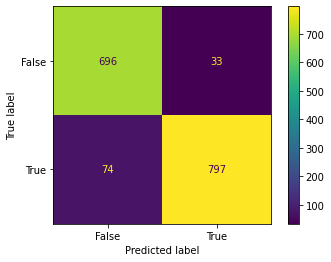

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_)
disp.plot(values_format='')

#### Interpreting the Confusion Matrix
In a binary classification problem (as it is the case in this application scenario), one can interpret the plot as follows:
- Top-right: Number of cases where they actually not have a true label and the true label was predicted. So it is (**FP**) **F**alse that it is true (**P**ositive). In our case, we must minimize this!
- Bottom-left: Number of cases where they actually have a true label and the true label was not predicted. So it is (**FN**) **F**alse that it is false (**N**egative). In our case, we maybe can minimize this.
- Top-left: Number of cases where they actually not have a true label and the true label was not predicted. So it is (**TN**) **T**rue that it is false (**N**egative).
- Bottom-right: Number of cases where they actually have the true label and the true label was predicted. So it is (**TP**) **T**rue that it is true (**P**ositive).

## 10. PMML Export
Finally, the trained model can now be exported with the library [sklearn2pmml](https://github.com/jpmml/sklearn2pmml) to PMML.

In [91]:
!pip install -q sklearn2pmml
from sklearn2pmml import sklearn2pmml
from sklearn2pmml import make_pmml_pipeline

pipeline = make_pmml_pipeline(
    model,
    active_fields= ["category", "urgency", "targetPrice", "price"],
    target_fields= ["approval"]
)
sklearn2pmml(pipeline, "order-approval.pmml")

     |████████████████████████████████| 6.0 MB 6.2 MB/s 
